## Analysing whether a worker needs mental health treatment or not

This notebook show how to make use of data  mining principles to identify and analyse patterns.

The overall objective is to predict whether individuals have sought treatment for mental health conditions using 26 feature variables and 1 target variable:

#### **Feature Variables** ####
1. **Age:** Age of the respondent.
2. **Gender:** Gender of the respondent.
3. **Country:** Country where the respondent resides.
4. **state:** State of residence for respondents in the United States.
5. **self_employed:** Whether the respondent is self-employed (Yes/No).
6. **family_history:** Whether there is a family history of mental illness (Yes/No).
7. **work_interfere:** Frequency of work interference due to mental health issues (Never/Rarely/Sometimes/Often).
8. **no_employees:** Number of employees in the respondent's company (e.g., 1-5, 6-25).
9. **remote_work:** Whether the respondent works remotely (Yes/No).
10. **tech_company:** Whether the respondent works for a tech company (Yes/No).
11. **benefits:** Whether mental health benefits are provided by the employer (Yes/No/Don't know).
12. **care_options:** Awareness of mental health care options provided by the employer (Yes/No/Not sure).
13. **wellness_program:** Participation in employer wellness programs (Yes/No/Don't know).
14. **seek_help:** Encouragement from the employer to seek mental health help (Yes/No/Don't know).
15. **anonymity:** Assurance of anonymity when seeking mental health help (Yes/No/Don't know).
16. **leave:** Ease of taking leave for mental health reasons (Very difficult/Somewhat difficult/Somewhat easy/Very easy).
17. **mental_health_consequence:** Concerns about consequences of discussing mental health (Yes/No/Maybe).
18. **phys_health_consequence:** Concerns about consequences of discussing physical health (Yes/No/Maybe).
19. **coworkers:** Comfort level in discussing mental health with coworkers (Yes/No/Some of them).
20. **supervisor:** Comfort level in discussing mental health with a supervisor (Yes/No/Some of them).
21. **mental_health_interview:** Whether discussing mental health issues would negatively impact a job interview (Yes/No/Maybe).
22. **phys_health_interview:** Whether discussing physical health issues would negatively impact a job interview (Yes/No/Maybe).
23. **mental_vs_physical:** Belief about equal importance of mental and physical health (Yes/No/Don't know).
24. **obs_consequence:** Whether observing consequences for others affects the respondent's willingness to discuss mental health (Yes/No).
25. **comments:** Any additional comments provided by the respondent.
26. **Timestamp:** The time when the survey response was recorded.

#### **Target Variable** ####
1. **treatment:** Whether the respondent has sought treatment for a mental health condition (Yes/No).

# Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/for-use-account/use/main/dataset.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


#### Statistical Description

In [3]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


#### Shape of the dataset

In [4]:
df.shape

(1259, 27)

#### Gender Percentage before preprcossing

In [5]:
# Filter the DataFrame for rows where 'Gender' is 'Female' or 'Male'
gender_filtered = df[df['Gender'].isin(['F', 'M'])]

# Count the number of rows for each gender where 'treatment' is 'Yes'
gender_mental_health_counts = gender_filtered[gender_filtered['treatment'] == 'Yes'].groupby('Gender').size()

# Calculate the percentage for each gender
total_gender_counts = gender_filtered.groupby('Gender').size()
percentage_mental_health = (gender_mental_health_counts / total_gender_counts) * 100

print("Percentage of individuals with mental health issues by gender:")
print(percentage_mental_health)

Percentage of individuals with mental health issues by gender:
Gender
F    68.421053
M    40.517241
dtype: float64


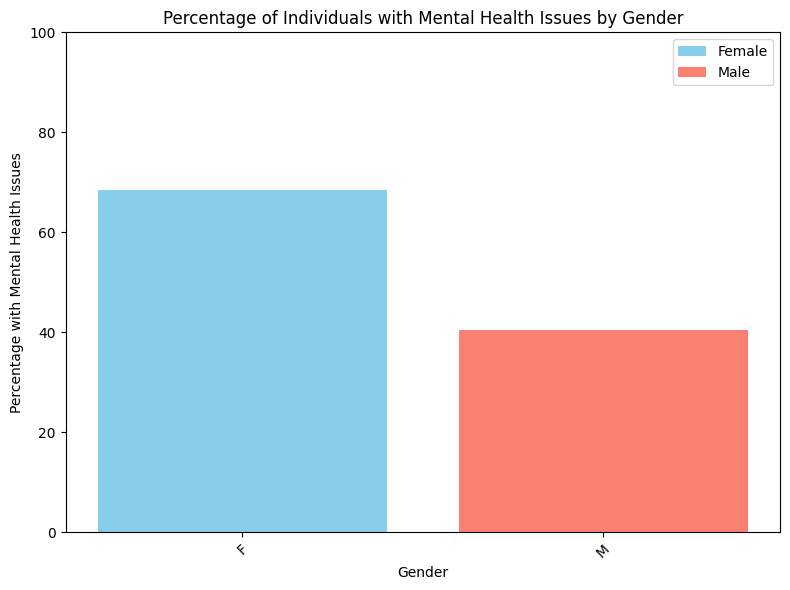

In [6]:
# Plotting the percentages
# Plotting the percentages
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
bars = plt.bar(percentage_mental_health.index, percentage_mental_health.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Mental Health Issues')
plt.title('Percentage of Individuals with Mental Health Issues by Gender')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentages
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add legend
plt.legend(bars, ['Female', 'Male'])

plt.show()

#### Age before Preprocessing

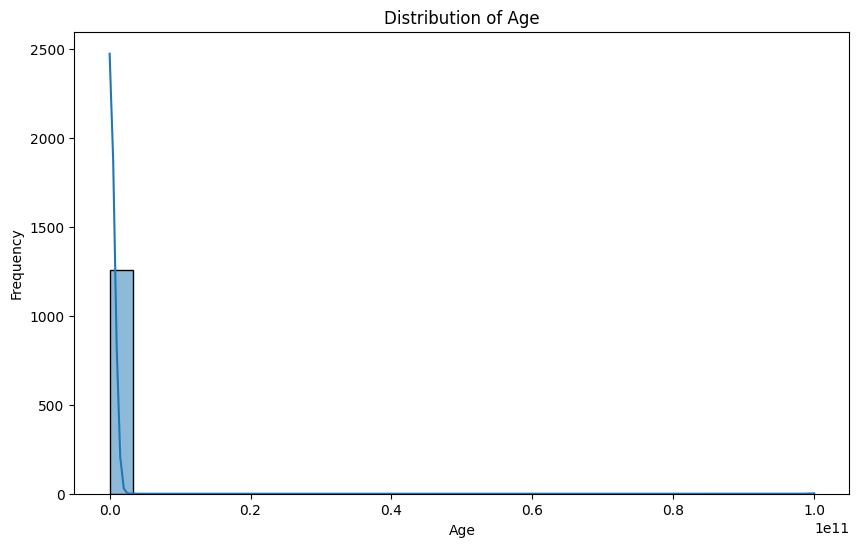

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df.isna().sum().transpose()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(['comments', 'Timestamp', 'state'], axis =1, inplace = True)

In [12]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [13]:
for_int = 0
for_str = 'NaN'
for_float = 0.0
int_features = ['Age']
str_feature = ['Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
float_feature = []
for feature in df:
    if feature in int_features:
        df[feature] =  df[feature].fillna(for_int)
    elif feature in str_feature:
        df[feature] = df[feature].fillna(for_str)
    elif feature in float_feature:
        df[feature] = df[feature].fillna(for_float)
    else:
        print('Feature', feature , 'not recoognize')


In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0


In [15]:
gender_unique=df['Gender'].unique()
gender=df['Gender'].value_counts()
print(gender_unique,gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'] Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Mak

We see lots of inconsistency in the Gender area. Let's fix it

In [16]:
# Replace values in the 'Gender' column
df['Gender'] = df['Gender'].replace({
    'm': 'M',
    'Make': 'M',
    'make': 'M',
    'male': 'M',
    'Male': 'M',
    'Male ': 'M',
    'Mal': 'M',
    'Man': 'M',
    'Mail': 'M',
    'Malr': 'M',
    'p': 'M',  # assuming 'p' is a typo for 'male'
    'msle': 'M',  # assuming 'msle' is a typo for 'male'
    'Male-ish': 'M',  # assuming 'Male-ish' is interpreted as male
    'Cis Male': 'M',
    'Cis Man': 'M',
    'Male (CIS)': 'M',
    'something kinda male?': 'M',
    'Guy (-ish) ^_^': 'M',
    'male leaning androgynous': 'M',

    'f': 'F',
    'woman': 'F',
    'Woman': 'F',
    'female': 'F',
    'femail': 'F',
    'Female': 'F',
    'Female ': 'F',
    'Femake': 'F',
    'Trans woman': 'F',  # assuming 'Trans woman' is female
    'Female (cis)': 'F',
    'Cis Female': 'F',
    'Trans-female': 'F',
    'Fluid': 'F',  # contextually if leaning female
    'Genderqueer': 'F',  # contextually if leaning female
    'Queer': 'F',  # contextually if leaning female
    'queer/she/they': 'F',  # includes female pronouns
    'Agender': 'F',  # contextually if leaning female
    'Enby': 'F',  # contextually if leaning female
    'Non-binary': 'F',  # contextually if leaning female
    'All': 'F',  # contextually inclusive of female
    'Nah': 'F'  # contextually could be female or none
})

# Verify the changes
print(df['Gender'].value_counts())

Gender
M                                                 993
F                                                 254
Female (trans)                                      2
maile                                               1
non-binary                                          1
fluid                                               1
Androgyne                                           1
cis-female/femme                                    1
Neuter                                              1
queer                                               1
cis male                                            1
A little about you                                  1
ostensibly male, unsure what that really means      1
Name: count, dtype: int64


The other values are few so I leave them as they are

In [17]:
# get all the unique values in the 'Country' column
countries = df['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['Australia', 'Austria', 'Bahamas, The', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico',
       'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'United Kingdom', 'United States',
       'Uruguay', 'Zimbabwe'], dtype=object)

Seems there're no duplicates in the country column. Now I want to see the differences between ages

In [18]:
# Count the occurrences of each unique age in the 'Age' column
age_counts = df['Age'].value_counts()

# Display the counts of each unique age
print(age_counts)


Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

Seems there are not making sense values so I'll choose only the range of ages between 18 to 47 years

In [19]:
# Filter the DataFrame to keep only rows with ages between 18 and 47
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 47)]

In [20]:
# Calculate Q1 and Q3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(len(outliers))

40


#### Outlier Detection

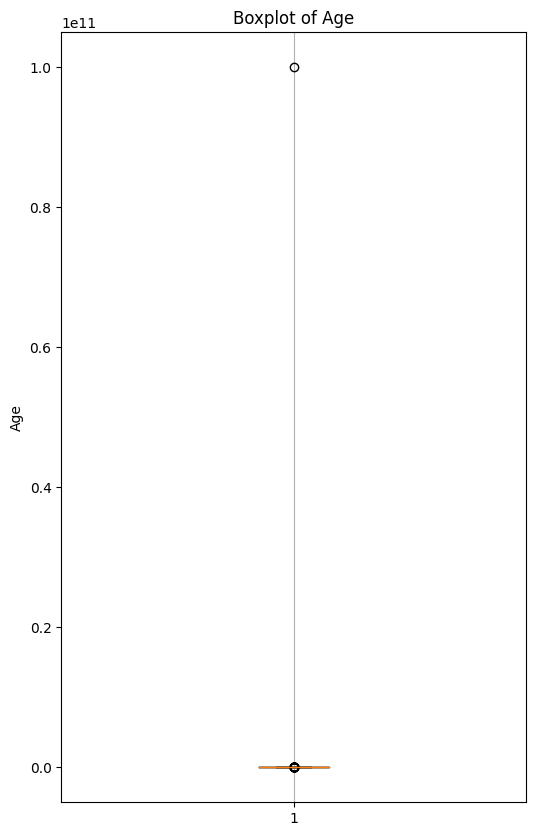

In [21]:
# Create boxplot
plt.figure(figsize=(6, 10))
plt.boxplot(df['Age'], vert=True)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(axis='x')

plt.show()

In [22]:
# Verify the changes
print(df_filtered['Age'].describe())
df=df_filtered

count    1209.000000
mean       31.328371
std         6.109286
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        47.000000
Name: Age, dtype: float64


Now the data is clean and ready to use for data analysis. We don't have a clear answer whether each one in the survey suffers from a mental problem. So we will count on the column 'treatment' which say if the person seeked for help or not. if yes we assume he has a problem and vice versa.

In [23]:
#Let's see how many seeked for help
df['treatment'].value_counts()

,count
treatment,
Yes,609
No,600


In [24]:
#the same with family history
df['family_history'].value_counts()

,count
family_history,
No,733
Yes,476


We will use the Cramer's V to see whether they have correlation these two columns:

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table for two categorical columns
contingency_table = pd.crosstab(df['treatment'], df['family_history'])

# Calculate chi-square test statistic and p-value
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Cramer's V: {cramer_v}")

Chi-Square Test Statistic: 173.031717792747
P-value: 1.610803052396677e-39
Cramer's V: 0.37831164455719013


We see the result close to 3.8 in Cramer's V which suggests a moderate relation between family history to seeking treatment.

Now we want to see whether women have more mentally problems than men

In [26]:
# Filter the DataFrame for rows where 'Gender' is 'Female' or 'Male'
gender_filtered = df[df['Gender'].isin(['F', 'M'])]

# Count the number of rows for each gender where 'treatment' is 'Yes'
gender_mental_health_counts = gender_filtered[gender_filtered['treatment'] == 'Yes'].groupby('Gender').size()

# Calculate the percentage for each gender
total_gender_counts = gender_filtered.groupby('Gender').size()
percentage_mental_health = (gender_mental_health_counts / total_gender_counts) * 100

print("Percentage of individuals with mental health issues by gender:")
print(percentage_mental_health)

Percentage of individuals with mental health issues by gender:
Gender
F    69.200000
M    45.042194
dtype: float64


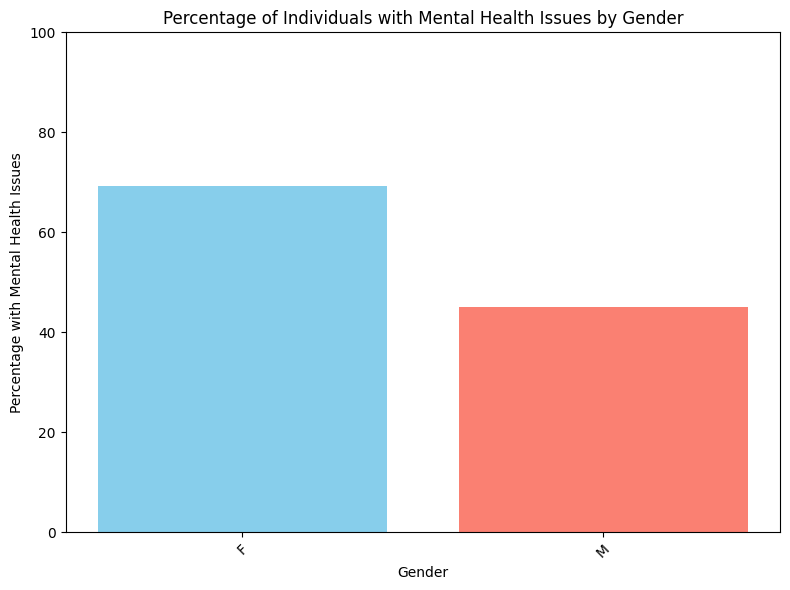

In [27]:
# Plotting the percentages
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(percentage_mental_health.index, percentage_mental_health.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Mental Health Issues')
plt.title('Percentage of Individuals with Mental Health Issues by Gender')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentages
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

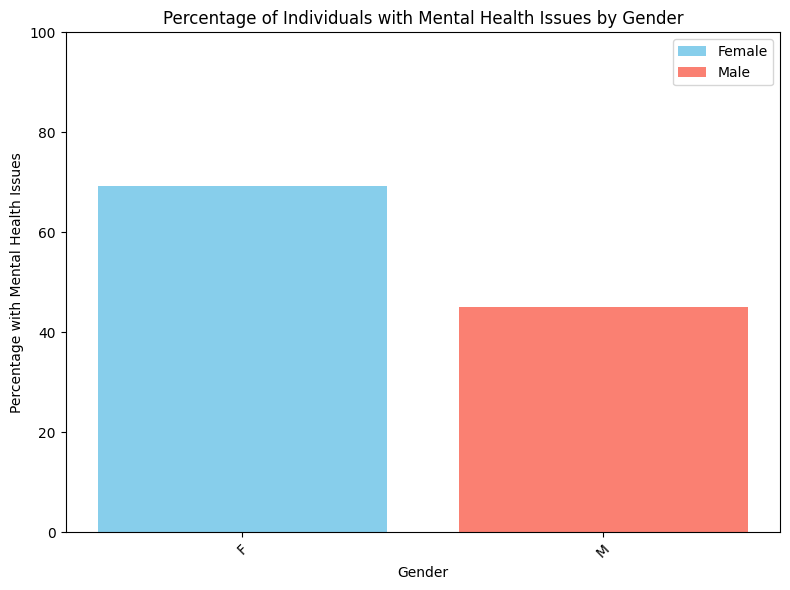

In [28]:
# Plotting the percentages
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
bars = plt.bar(percentage_mental_health.index, percentage_mental_health.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Mental Health Issues')
plt.title('Percentage of Individuals with Mental Health Issues by Gender')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentages
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add legend
plt.legend(bars, ['Female', 'Male'])

plt.show()

We can see that according to their relation in the population women have reported much more about mentally issues than men. Still,it doesn't say women have more problems because maybe they only share their problems more than men since they less shy to reveal their feelings, they less try to be strong,etc.

Now we gonna see which ages tend to suffer more from mental health issues

#### Immputing Data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data = df

# Handle missing values
# For simplicity, we will fill missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data_imputed['Gender']

,Gender
0,F
1,M
2,M
3,M
4,M
...,...
1204,M
1205,M
1206,M
1207,F


#### Label Encoding

In [30]:
# Encode categorical variables
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

#### Visulizations

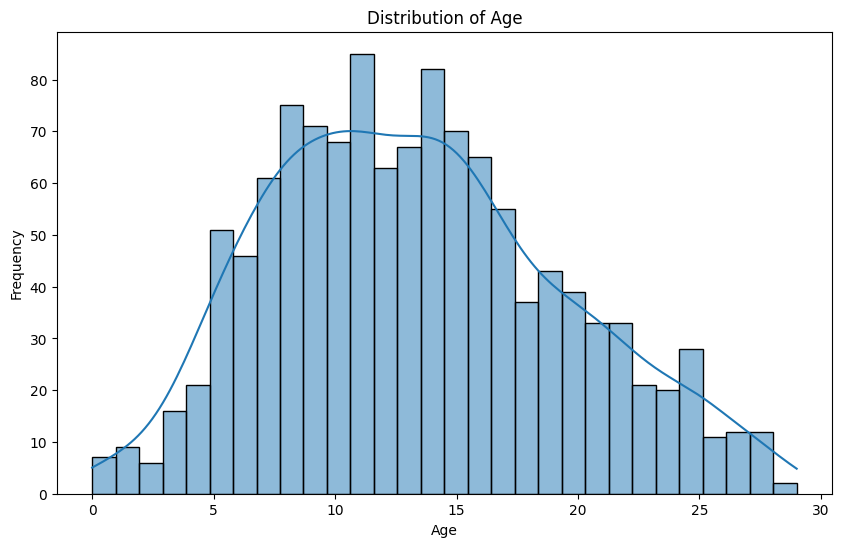

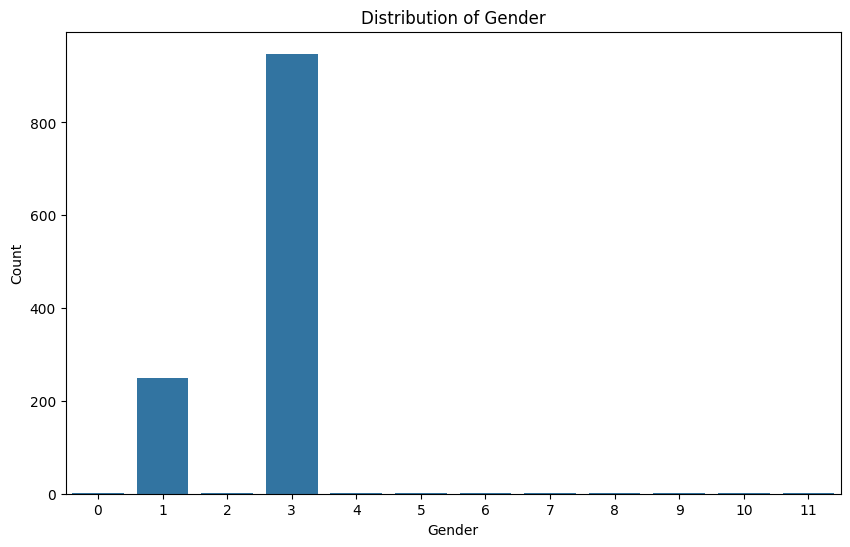

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_imputed['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_imputed)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

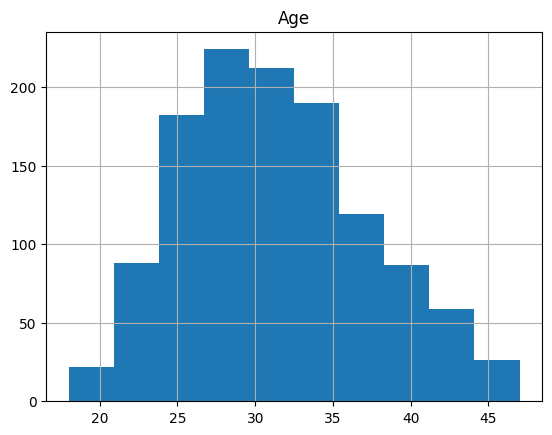

In [32]:
df.hist()

# One Hot Encoding

In [33]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [34]:
exclude_columns = ['Age','treatment']
encode = [col for col in df.columns if col not in exclude_columns]

In [35]:
one_encode = pd.get_dummies(df,columns = encode,drop_first=True,dtype=int)

In [36]:
one_encode

,Age,treatment,Gender_F,Gender_Female (trans),Gender_M,Gender_Neuter,Gender_cis male,Gender_cis-female/femme,Gender_fluid,Gender_maile,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,Yes,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,No,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,No,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,Yes,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,No,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Yes,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1255,32,Yes,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1256,34,Yes,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1257,46,No,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


# Outlier Detection

In [37]:
one_encode.columns

Index(['Age', 'treatment', 'Gender_F', 'Gender_Female (trans)', 'Gender_M',
       'Gender_Neuter', 'Gender_cis male', 'Gender_cis-female/femme',
       'Gender_fluid', 'Gender_maile', 'Gender_non-binary',
       'Gender_ostensibly male, unsure what that really means', 'Gender_queer',
       'Country_Austria', 'Country_Belgium', 'Country_Bosnia and Herzegovina',
       'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_China',
       'Country_Colombia', 'Country_Costa Rica', 'Country_Croatia',
       'Country_Czech Republic', 'Country_Denmark', 'Country_Finland',
       'Country_France', 'Country_Georgia', 'Country_Germany',
       'Country_Greece', 'Country_Hungary', 'Country_India', 'Country_Ireland',
       'Country_Israel', 'Country_Italy', 'Country_Latvia', 'Country_Mexico',
       'Country_Moldova', 'Country_Netherlands', 'Country_New Zealand',
       'Country_Nigeria', 'Country_Norway', 'Country_Philippines',
       'Country_Poland', 'Country_Portugal', 'Country_Ro

In [38]:
cols_one = ['self_employed_No','self_employed_Yes', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy']
cols1 = ['Gender_F', 'Gender_Female (trans)', 'Gender_M',
       'Gender_Neuter', 'Gender_cis male', 'Gender_cis-female/femme',
       'Gender_fluid', 'Gender_maile', 'Gender_non-binary',
       'Gender_ostensibly male, unsure what that really means', 'Gender_queer']
cols2 = [
    'Country_Austria', 'Country_Belgium', 'Country_Bosnia and Herzegovina',
    'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_China',
    'Country_Colombia', 'Country_Costa Rica', 'Country_Croatia',
    'Country_Czech Republic', 'Country_Denmark', 'Country_Finland',
    'Country_France', 'Country_Georgia', 'Country_Germany',
    'Country_Greece', 'Country_Hungary', 'Country_India', 'Country_Ireland',
    'Country_Israel', 'Country_Italy', 'Country_Latvia', 'Country_Mexico',
    'Country_Moldova', 'Country_Netherlands', 'Country_New Zealand',
    'Country_Nigeria', 'Country_Norway', 'Country_Philippines',
    'Country_Poland', 'Country_Portugal', 'Country_Romania',
    'Country_Russia', 'Country_Singapore', 'Country_Slovenia',
    'Country_South Africa', 'Country_Spain', 'Country_Sweden',
    'Country_Switzerland', 'Country_Thailand', 'Country_United Kingdom',
    'Country_United States', 'Country_Uruguay'
]
cols3 = [
    'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_No',
       'mental_vs_physical_Yes', 'obs_consequence_Yes'
]

In [39]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [40]:
cols_df = ['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'self_employed_No'),
  Text(0, 1, 'self_employed_Yes'),
  Text(0, 2, 'family_history_Yes'),
  Text(0, 3, 'work_interfere_Never'),
  Text(0, 4, 'work_interfere_Often'),
  Text(0, 5, 'work_interfere_Rarely'),
  Text(0, 6, 'work_interfere_Sometimes'),
  Text(0, 7, 'no_employees_100-500'),
  Text(0, 8, 'no_employees_26-100'),
  Text(0, 9, 'no_employees_500-1000'),
  Text(0, 10, 'no_employees_6-25'),
  Text(0, 11, 'no_employees_More than 1000'),
  Text(0, 12, 'remote_work_Yes'),
  Text(0, 13, 'tech_company_Yes'),
  Text(0, 14, 'benefits_No'),
  Text(0, 15, 'benefits_Yes'),
  Text(0, 16, 'care_options_Not sure'),
  Text(0, 17, 'care_options_Yes'),
  Text(0, 18, 'wellness_program_No'),
  Text(0, 19, 'wellness_program_Yes'),
  Text(0, 20, 'seek_help_No'),
  Text(0, 21, 'seek_help_Yes'),
  Text(0, 22, 'anonymity_No'),
  Text(

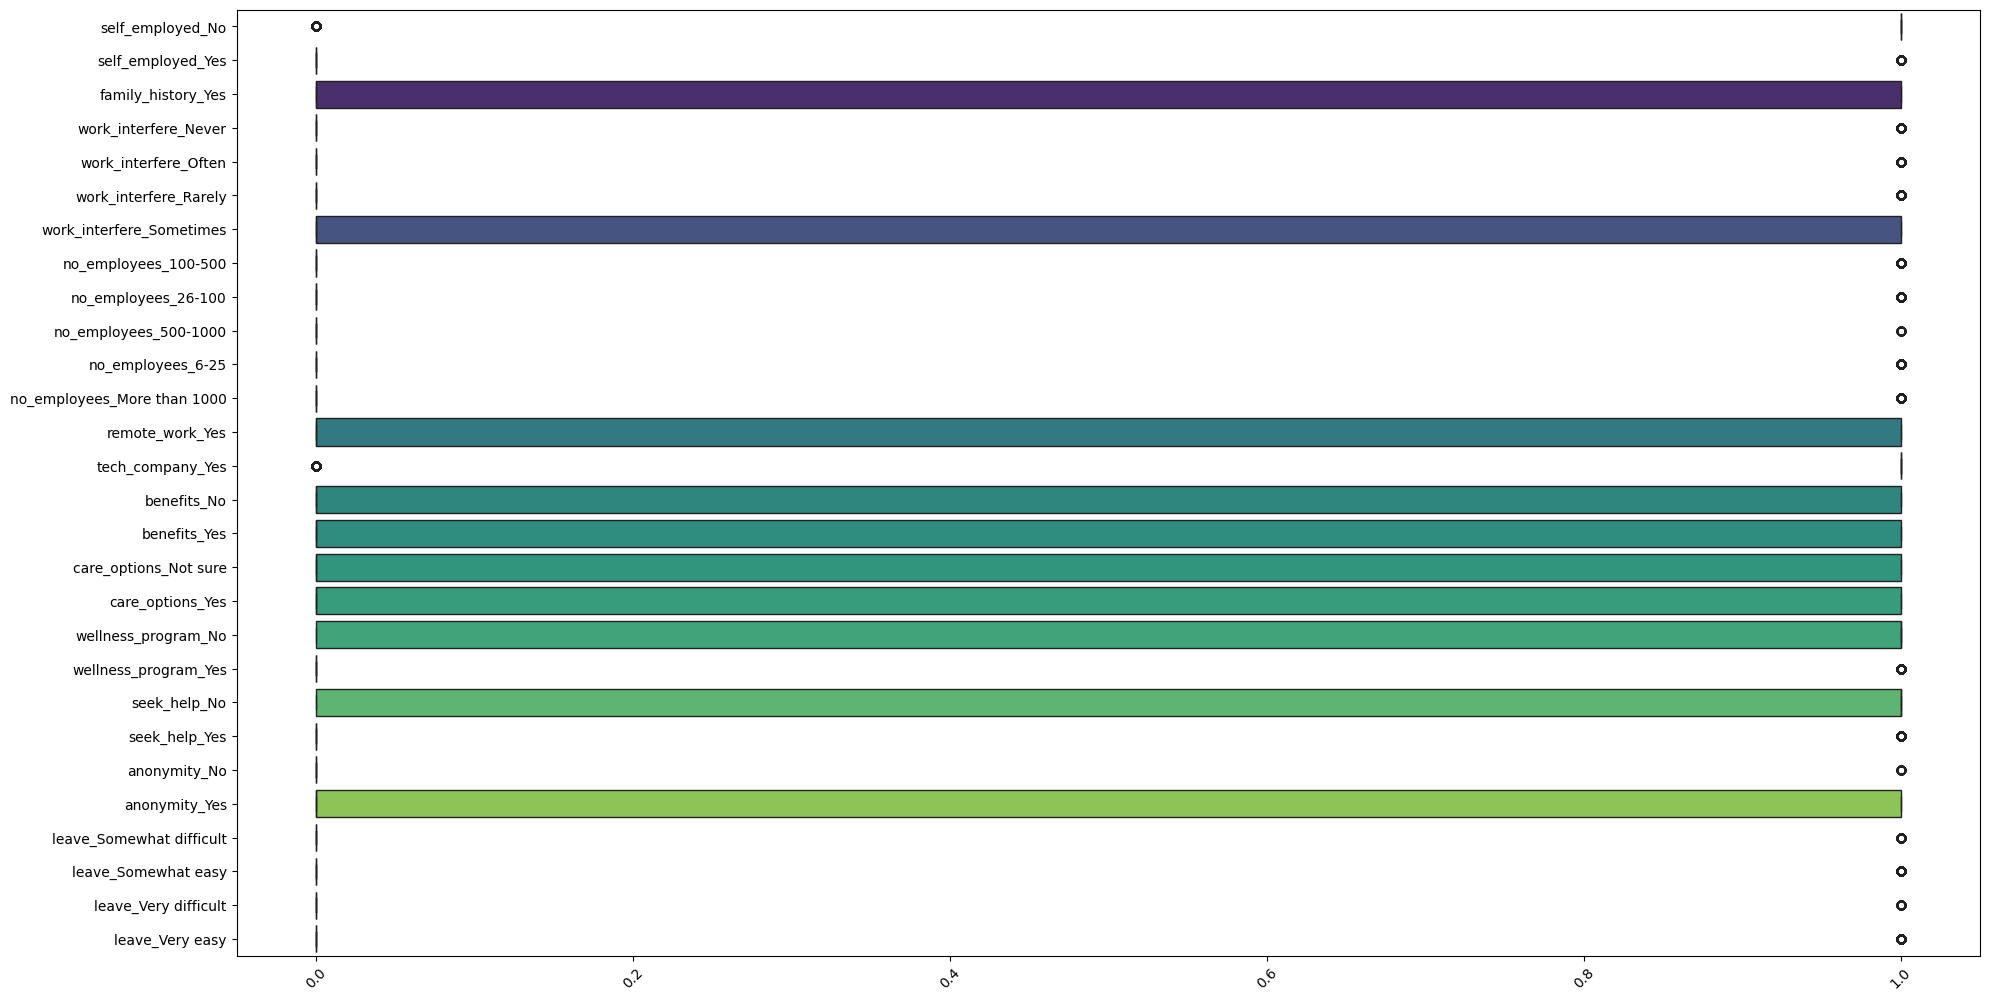

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=one_encode[cols_one], orient='h', palette='viridis')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Gender_F'),
  Text(0, 1, 'Gender_Female (trans)'),
  Text(0, 2, 'Gender_M'),
  Text(0, 3, 'Gender_Neuter'),
  Text(0, 4, 'Gender_cis male'),
  Text(0, 5, 'Gender_cis-female/femme'),
  Text(0, 6, 'Gender_fluid'),
  Text(0, 7, 'Gender_maile'),
  Text(0, 8, 'Gender_non-binary'),
  Text(0, 9, 'Gender_ostensibly male, unsure what that really means'),
  Text(0, 10, 'Gender_queer')])

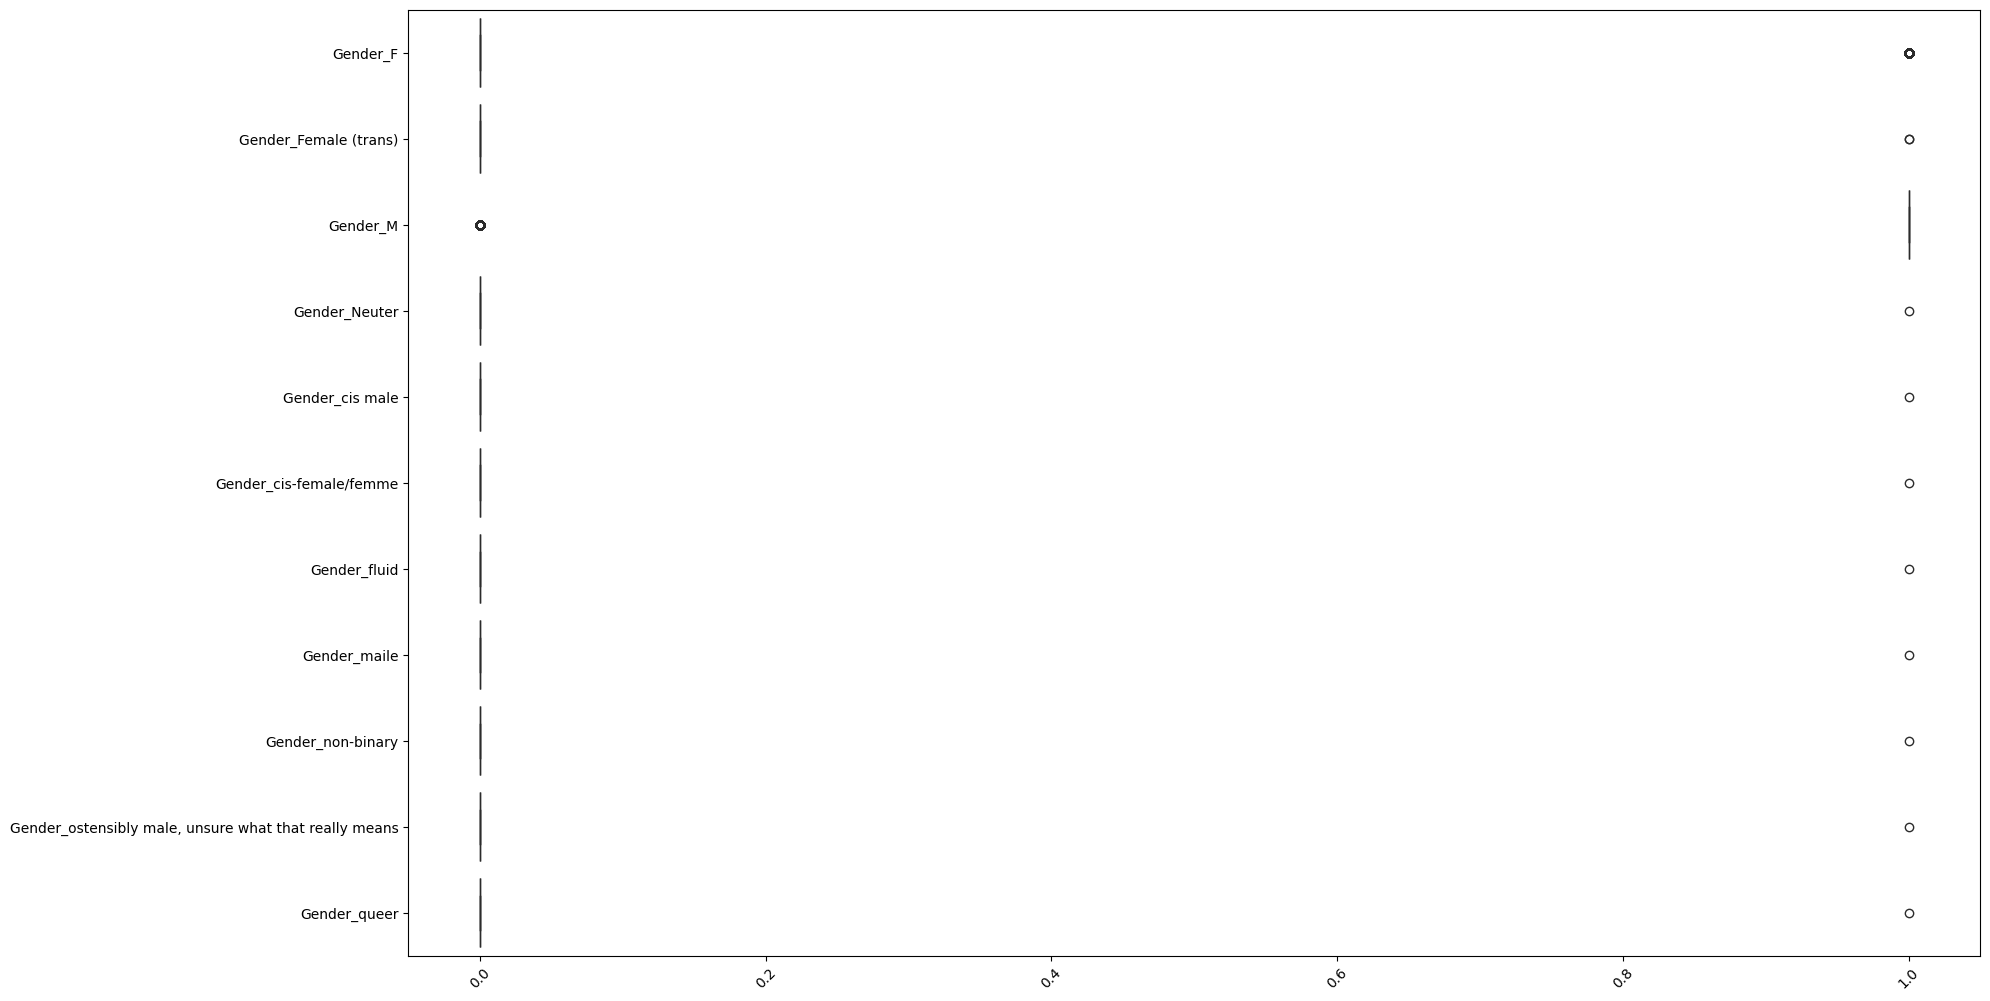

In [42]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=one_encode[cols1], orient='h', palette='viridis')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, 'Country_Austria'),
  Text(0, 1, 'Country_Belgium'),
  Text(0, 2, 'Country_Bosnia and Herzegovina'),
  Text(0, 3, 'Country_Brazil'),
  Text(0, 4, 'Country_Bulgaria'),
  Text(0, 5, 'Country_Canada'),
  Text(0, 6, 'Country_China'),
  Text(0, 7, 'Country_Colombia'),
  Text(0, 8, 'Country_Costa Rica'),
  Text(0, 9, 'Country_Croatia'),
  Text(0, 10, 'Country_Czech Republic'),
  Text(0, 11, 'Country_Denmark'),
  Text(0, 12, 'Country_Finland'),
  Text(0, 13, 'Country_France'),
  Text(0, 14, 'Country_Georgia'),
  Text(0, 15, 'Country_Germany'),
  Text(0, 16, 'Country_Greece'),
  Text(0, 17, 'Country_Hungary'),
  Text(0, 18, 'Country_India'),
  Text(0, 19, 'Country_Ireland'),
  Text(0, 20, 'Country_Israel'),
  Text(0, 21, 'Country_

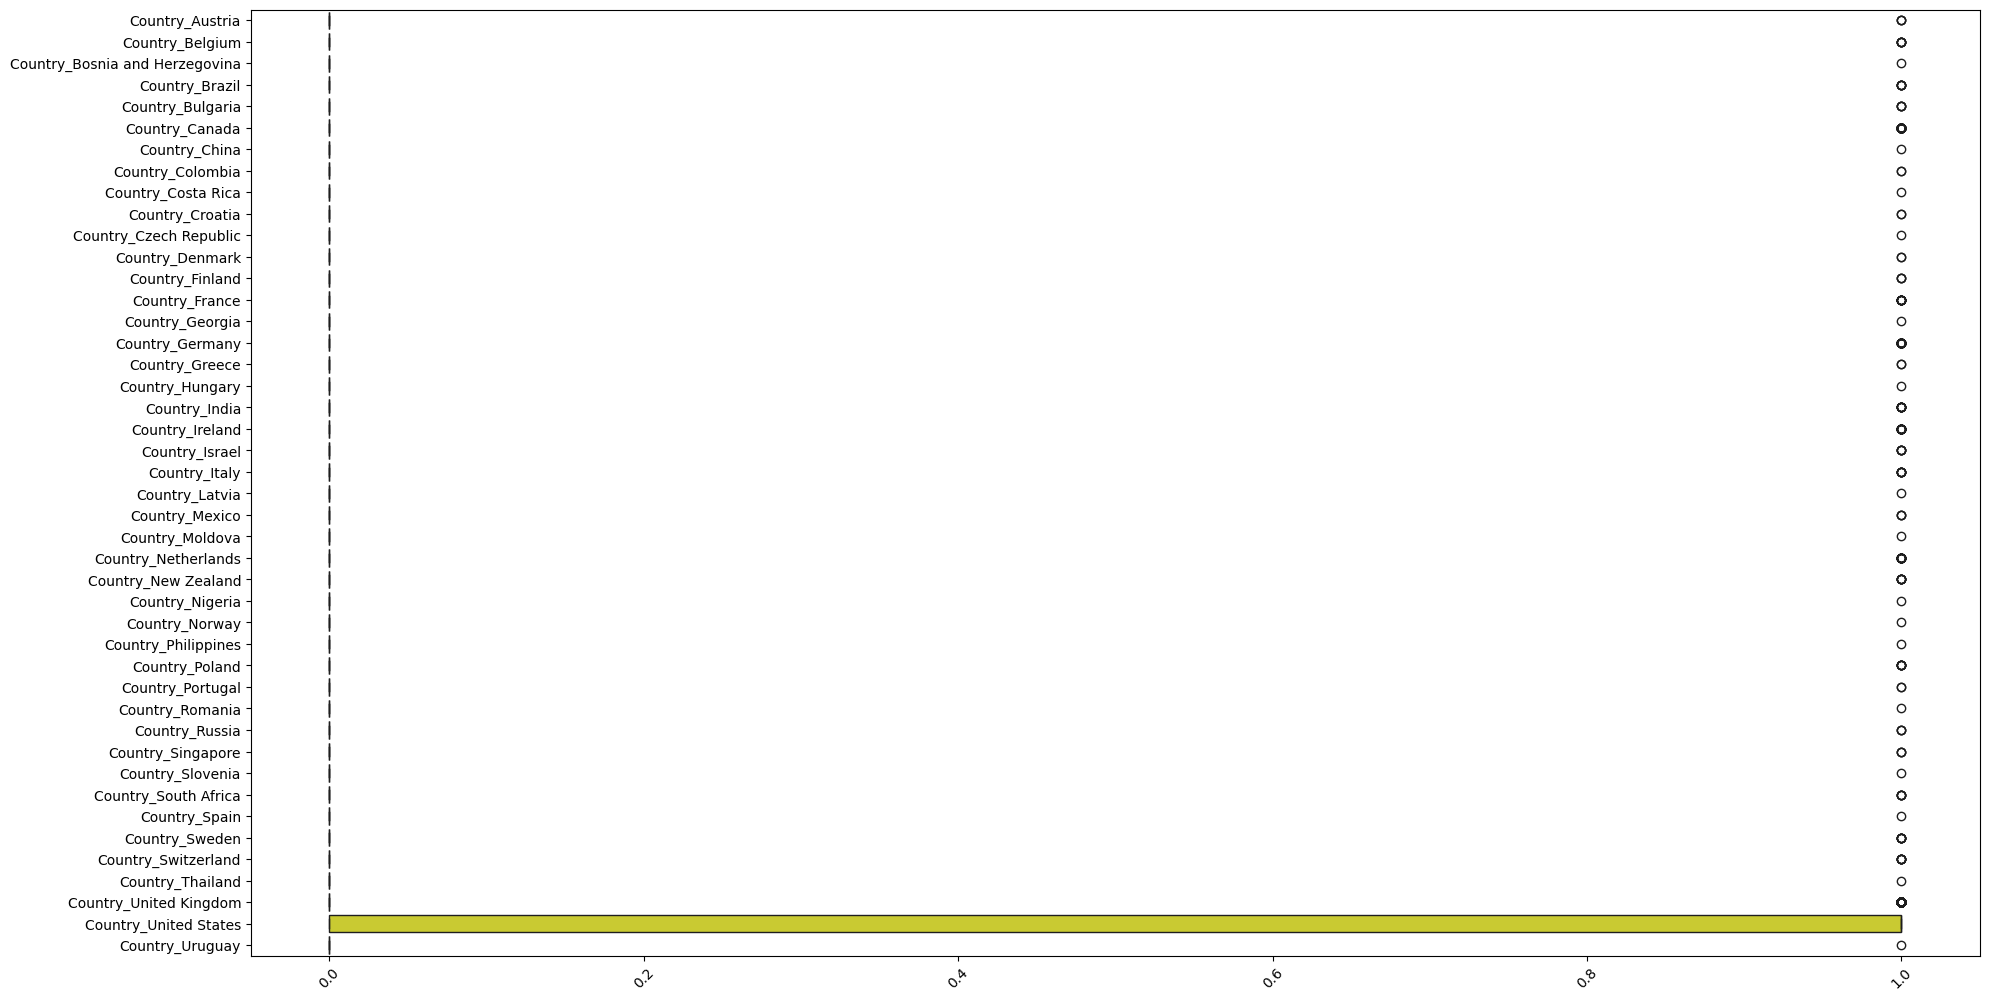

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=one_encode[cols2], orient='h', palette='viridis')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'mental_health_consequence_No'),
  Text(0, 1, 'mental_health_consequence_Yes'),
  Text(0, 2, 'phys_health_consequence_No'),
  Text(0, 3, 'phys_health_consequence_Yes'),
  Text(0, 4, 'coworkers_Some of them'),
  Text(0, 5, 'coworkers_Yes'),
  Text(0, 6, 'supervisor_Some of them'),
  Text(0, 7, 'supervisor_Yes'),
  Text(0, 8, 'mental_health_interview_No'),
  Text(0, 9, 'mental_health_interview_Yes'),
  Text(0, 10, 'phys_health_interview_No'),
  Text(0, 11, 'phys_health_interview_Yes'),
  Text(0, 12, 'mental_vs_physical_No'),
  Text(0, 13, 'mental_vs_physical_Yes'),
  Text(0, 14, 'obs_consequence_Yes')])

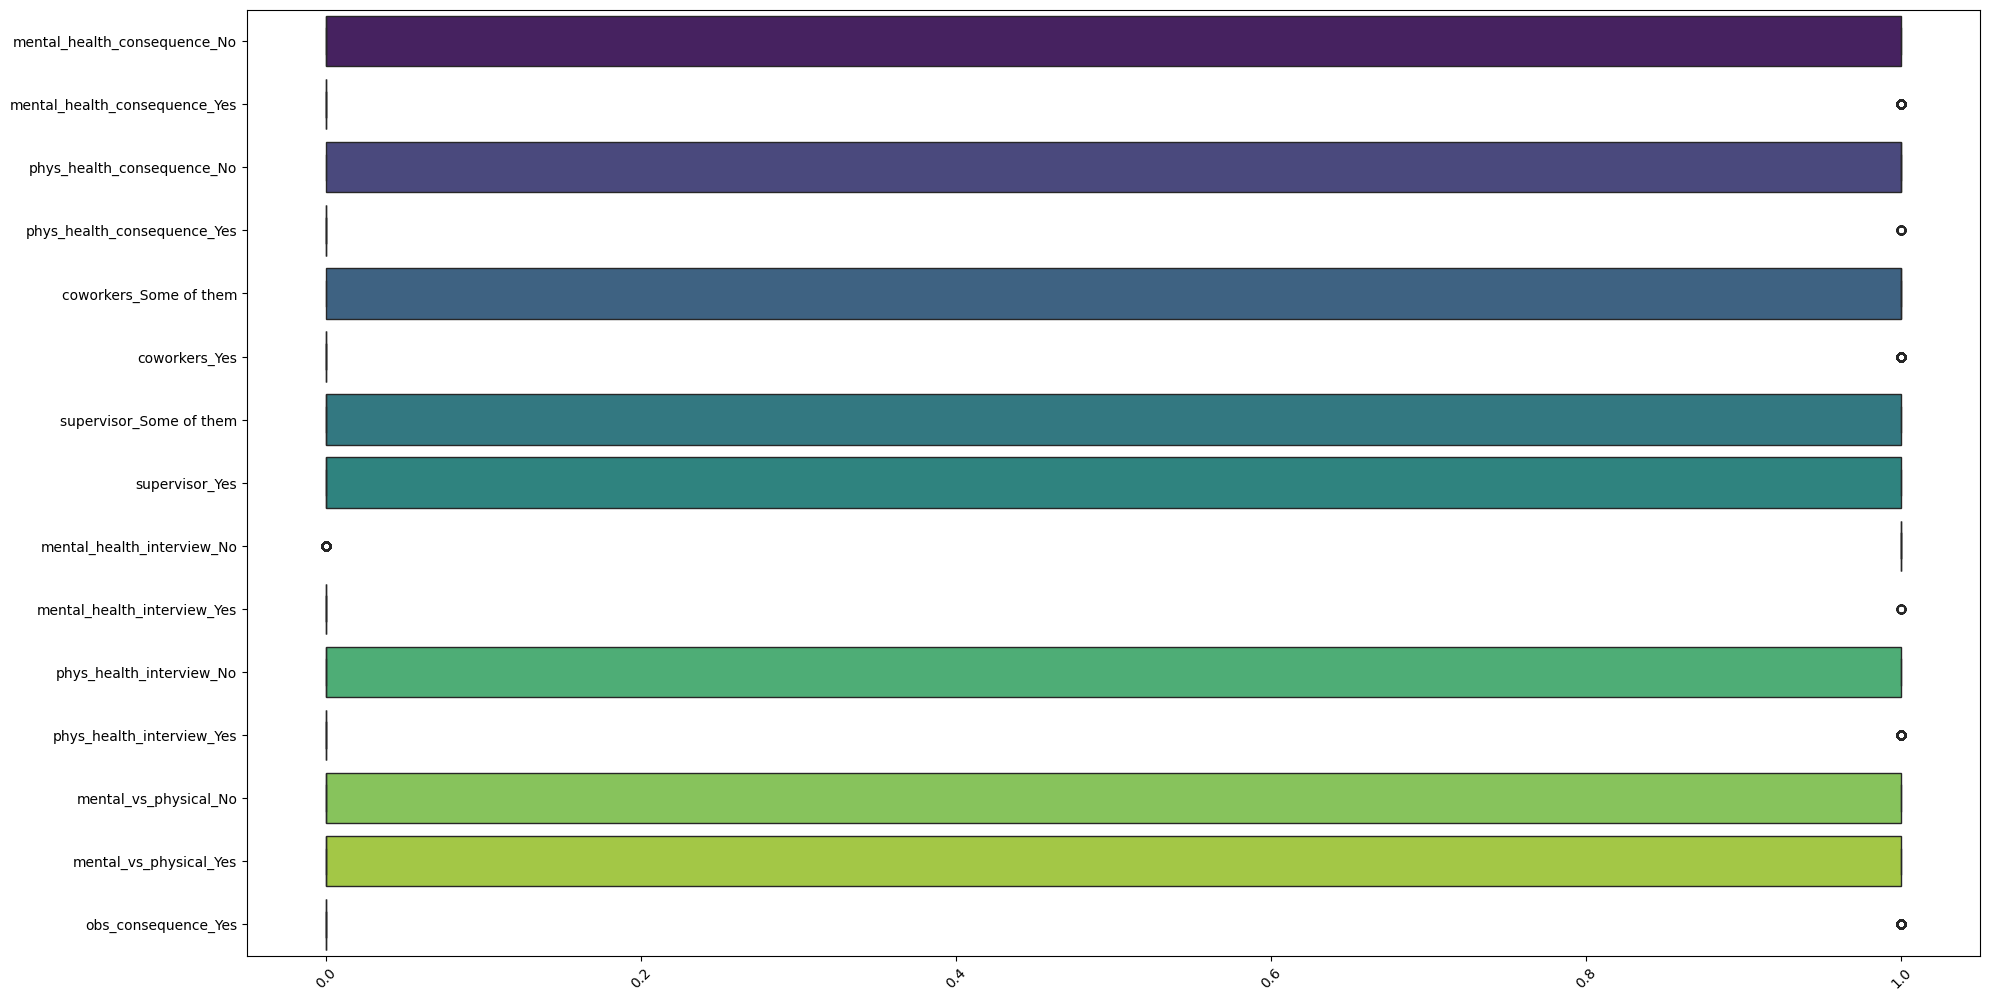

In [44]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=one_encode[cols3], orient='h', palette='viridis')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

(array([15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40'),
  Text(0, 45.0, '45'),
  Text(0, 50.0, '50')])

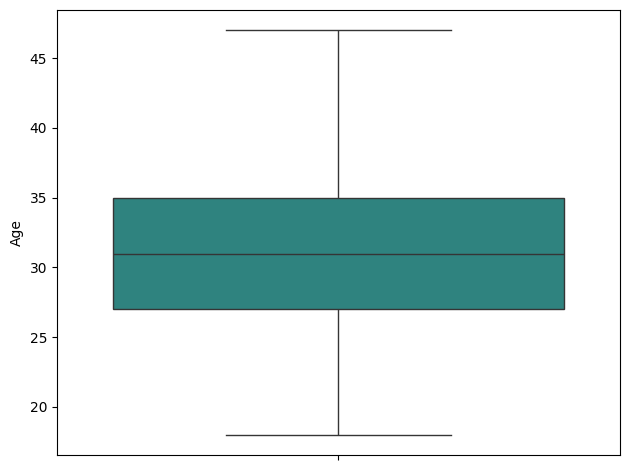

In [45]:
sns.boxplot(data=one_encode['Age'],palette='viridis')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

<Axes: >

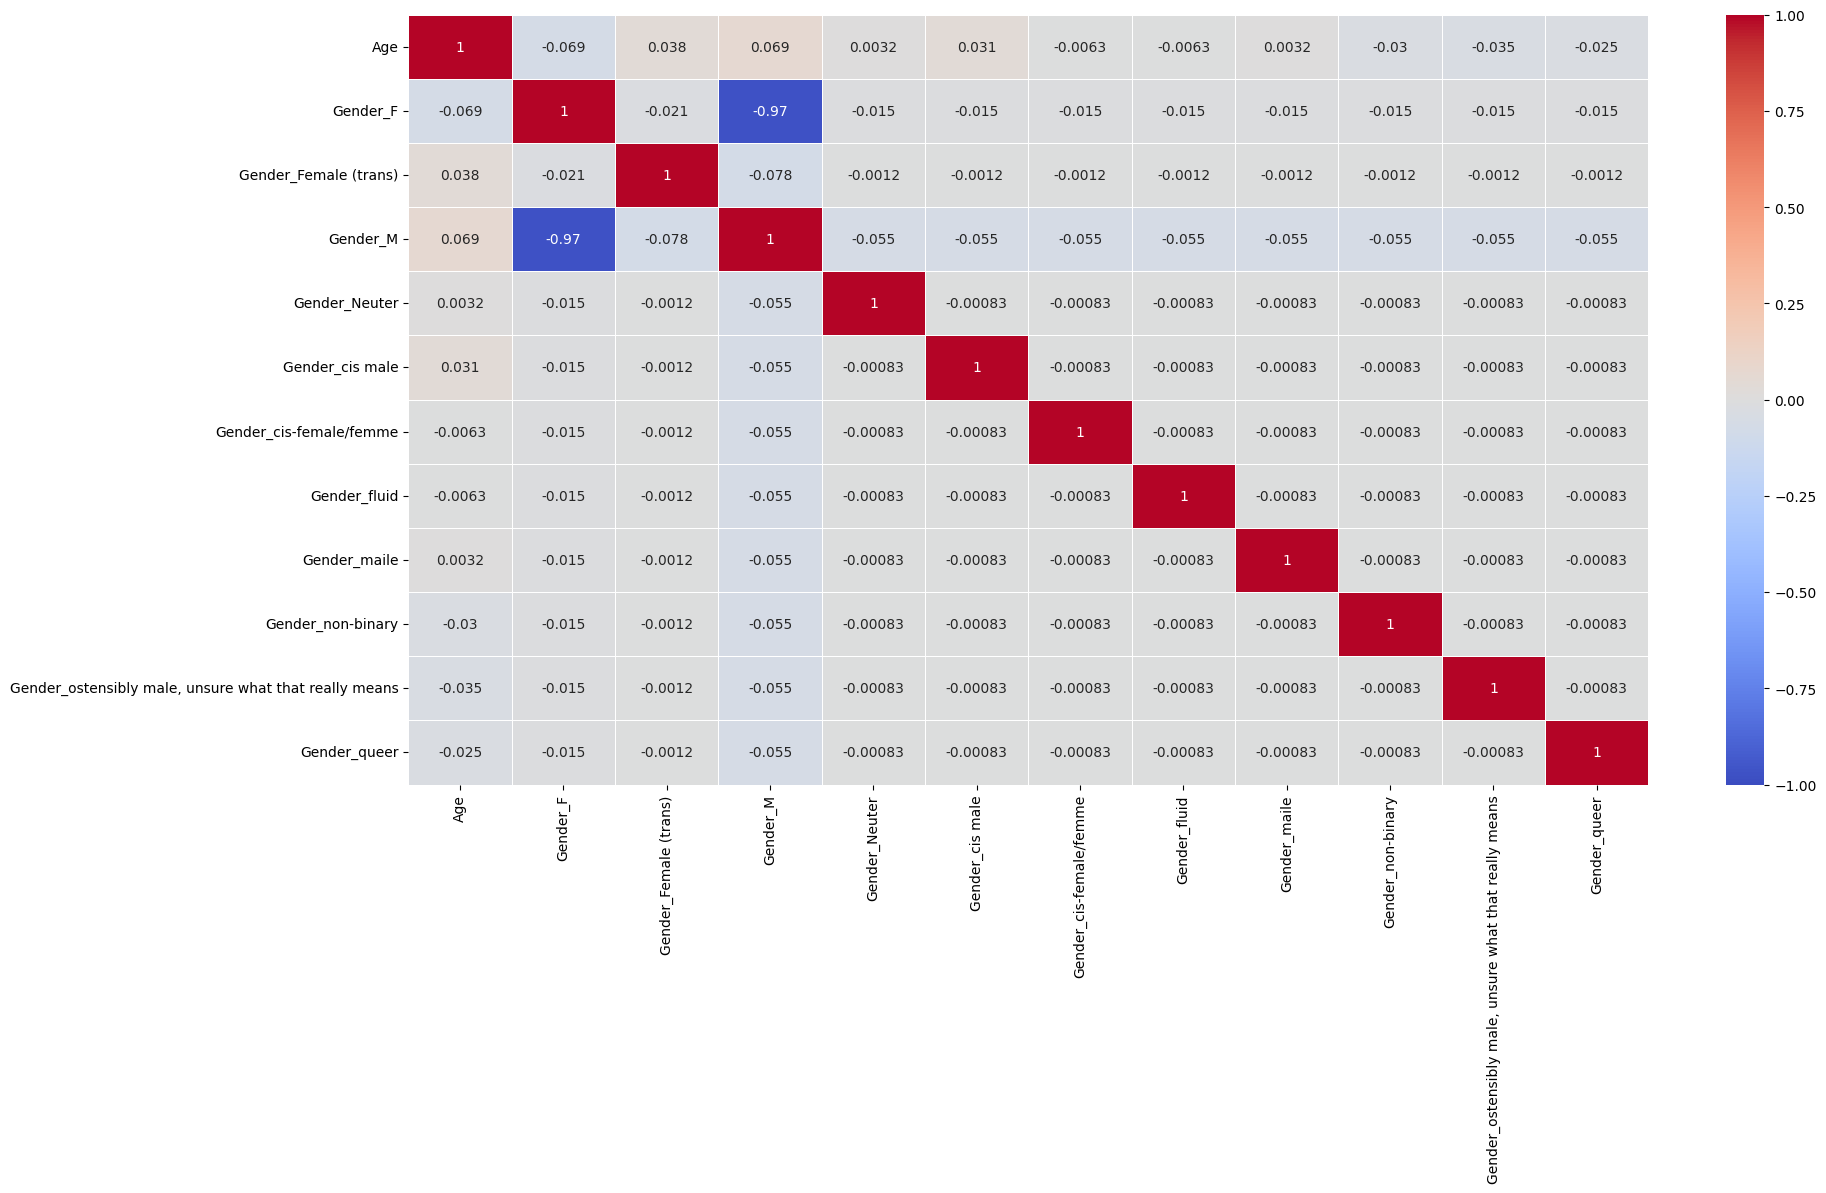

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(one_encode[['Age']+cols1].corr(), annot=True, vmin =-1, vmax = 1, cmap='coolwarm', linewidths=0.5)

<Axes: >

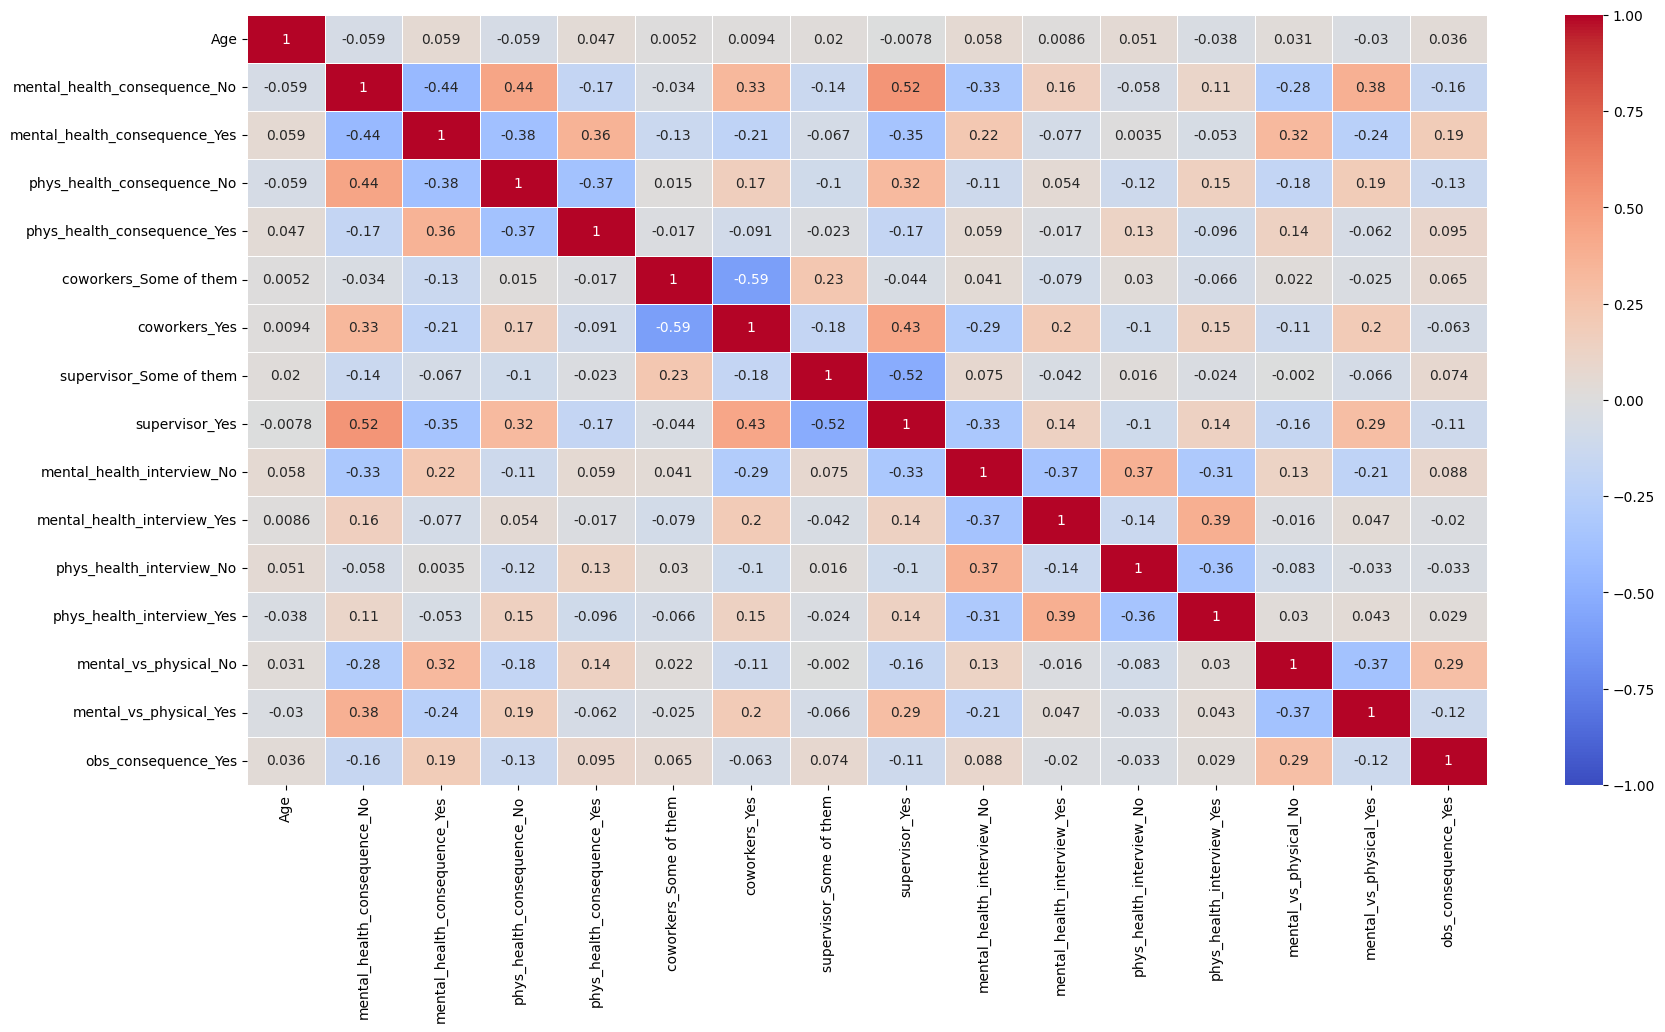

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(one_encode[['Age']+cols3].corr(), annot=True, vmin =-1, vmax = 1, cmap='coolwarm', linewidths=0.5)

# __Train Test Split ( Train -> 80%, Test -> 20%)__

In [48]:
X = data_imputed.drop(columns=['treatment'])
y = data_imputed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the prepared data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((967, 23), (242, 23), (967,), (242,))

## Modeling

#### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Predictions

In [50]:
# Predict the target variables
y_pred_rf = rf_model.predict(X_test)

##### Evaluate The model

Accuracy: 83.0579
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       112
           1       0.80      0.91      0.85       130

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.83       242
weighted avg       0.84      0.83      0.83       242



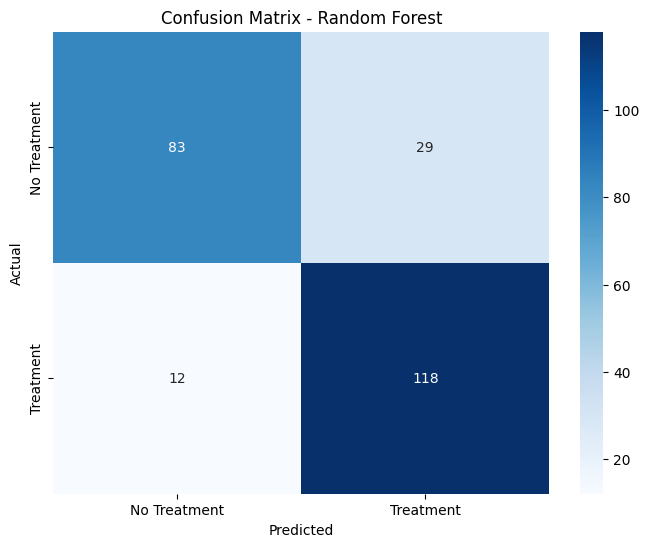

In [51]:
# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the classification report
print("Accuracy:", round(accuracy_rf*100,4))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [52]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

pred_test_df

,Actual,Predicted
101,0,0
432,1,1
309,1,1
109,1,1
1001,1,1
...,...,...
308,1,0
665,0,0
968,0,0
298,0,1


##### Evaluating using R^2

In [53]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_rf_model_test = round(rf_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_rf_model_test))

R^2 Test: 0.83


##### Determine Feature Importance

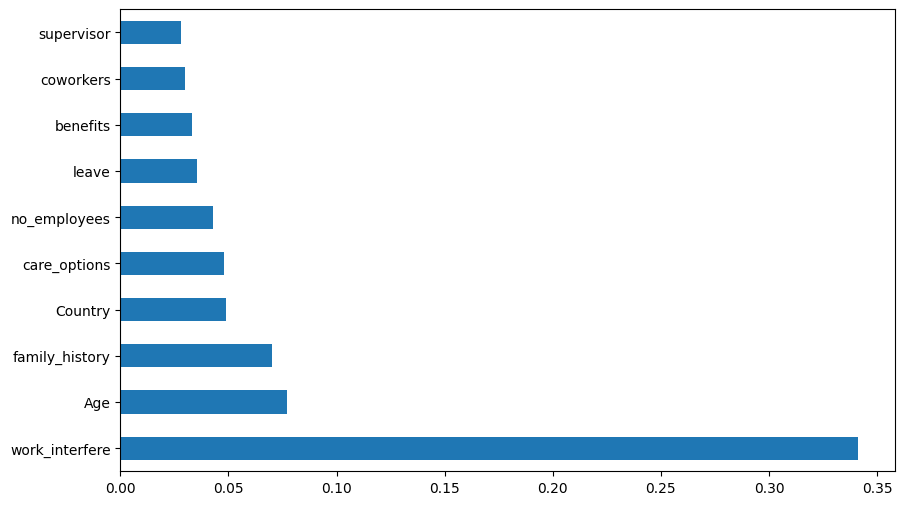

In [54]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

#### Gaussian Navie Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

##### Predictions

In [56]:
# Predict the target variable on the test set
y_pred_nb = nb_model.predict(X_test)

##### Evaluate the model

Accuracy: 78.0992

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.80      0.79      0.80       130

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242



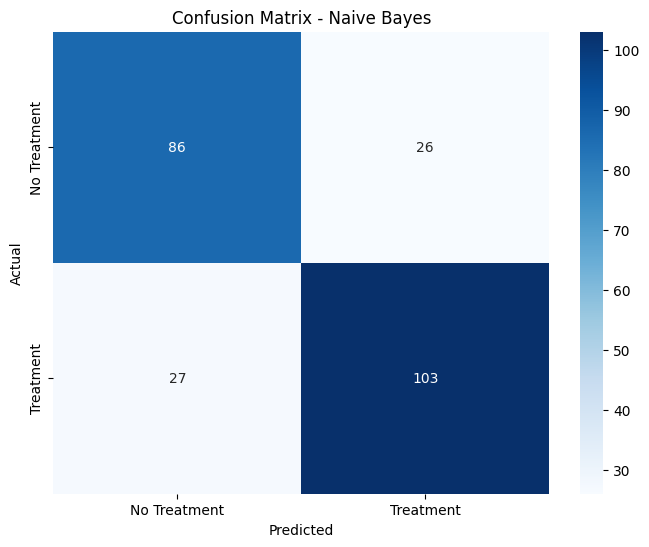

In [57]:
# Evaluate the model performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy:", round(accuracy_nb*100,4))
# Evaluate the model performance
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Evaluating using R^2

In [58]:
r2_nb_model_test = round(nb_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_nb_model_test))

R^2 Test: 0.78


##### Feature Importance

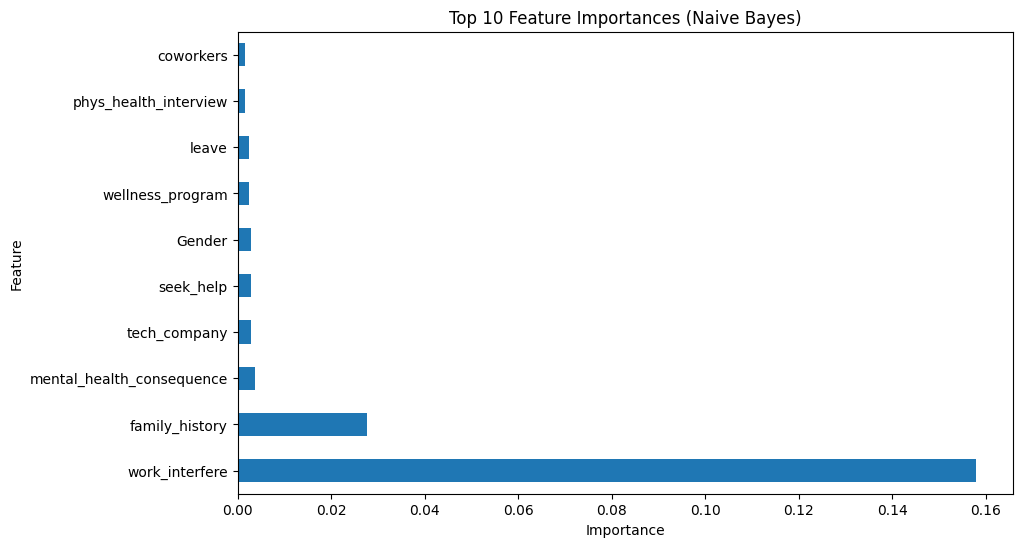

In [59]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a Series for the importance scores
feat_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)

plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Naive Bayes)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### __GridSearchCV__

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [61]:

# Separate the features and the target variable
X = data_imputed.drop(columns=['treatment'])
y = data_imputed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Grid parameters

In [62]:
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    }
}

##### Calculating Best Models

In [63]:
best_models = {}
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1, verbose=2)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_

    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best score for {model_name}: {clf.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}
Best score for RandomForestClassifier: 0.8304097003365204
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.7941723198547086


In [64]:
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: RandomForestClassifier
Accuracy: 0.8181818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       112
           1       0.80      0.88      0.84       130

    accuracy                           0.82       242
   macro avg       0.82      0.81      0.82       242
weighted avg       0.82      0.82      0.82       242

------------------------------------------------------------
Model: GaussianNB
Accuracy: 0.78099173553719
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.80      0.79      0.80       130

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

------------------------------------------------------------


##### Model Comparison

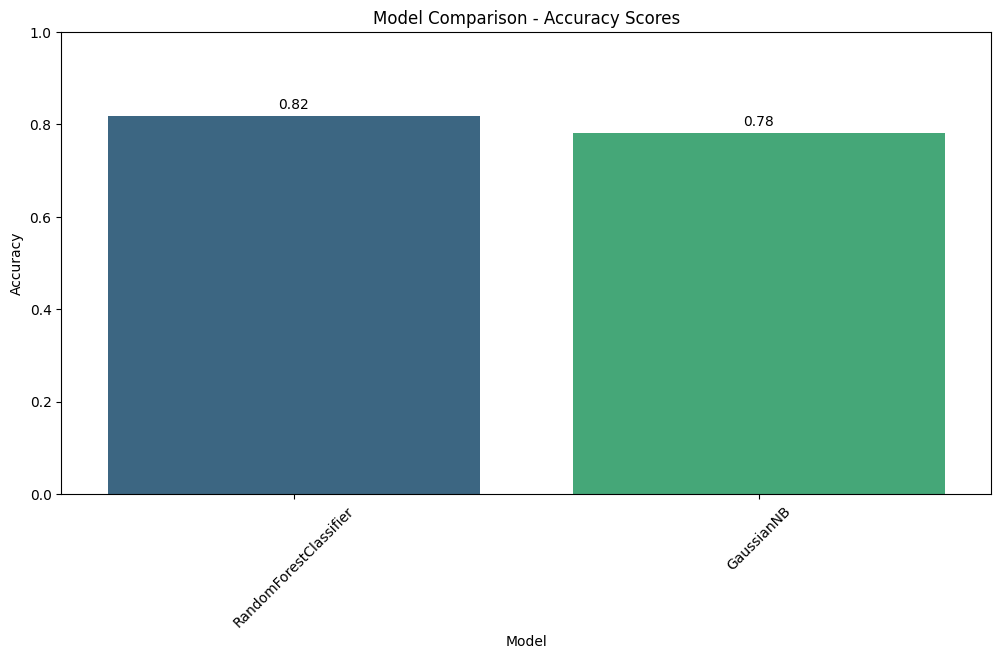

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

# Compare the accuracy of the best models
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add accuracy annotations on the bars
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

##### Hyper Parameter Tuning

###### _Random Forest_

In [66]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8241867421612094


###### _Guassian NB_

In [67]:
param_grid_gnb = {}

grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb.fit(X_train, y_train)

print("Best parameters for GaussianNB:", grid_search_gnb.best_params_)
print("Best score for GaussianNB:", grid_search_gnb.best_score_)

Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.7941723198547086


###### _Model Evaluation and Visualization_

In [68]:
# Collect the best estimators
best_models = {
    'Random Forest': grid_search_rf.best_estimator_,
    'GausianNB': grid_search_gnb.best_estimator_
}

# Evaluate and plot confusion matrices
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80       112
           1       0.80      0.91      0.85       130

    accuracy                           0.83       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.83      0.83      0.82       242

GausianNB Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.80      0.79      0.80       130

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242



#### _Comapring the performace of the models_

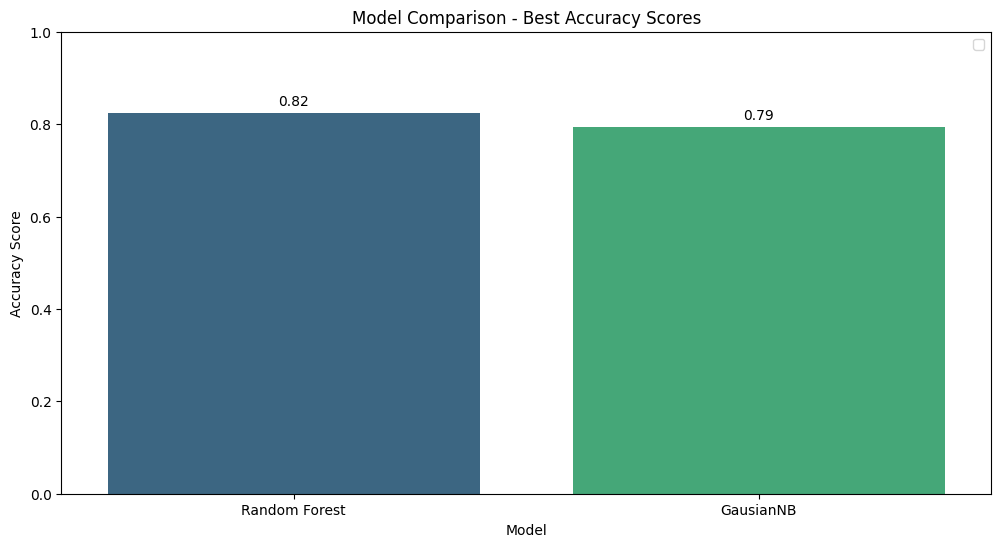

In [69]:
# Extract the best scores
model_names = list(best_models.keys())
best_scores = [

    grid_search_rf.best_score_,
    grid_search_gnb.best_score_
]

# Plot the accuracy scores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=best_scores, palette='viridis')
plt.title('Model Comparison - Best Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

# Add accuracy annotations on the bars
for i, score in enumerate(best_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.legend()
plt.show()

# __Train Test Split ( Train -> 75%, Test -> 25%)__

In [70]:
X = data_imputed.drop(columns=['treatment'])
y = data_imputed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Show the prepared data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((906, 23), (303, 23), (906,), (303,))

## Modeling

#### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Predictions

In [72]:
# Predict the target variables
y_pred_rf = rf_model.predict(X_test)

##### Evaluate The model

Accuracy: 83.1683
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       143
           1       0.82      0.88      0.85       160

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.83      0.83      0.83       303



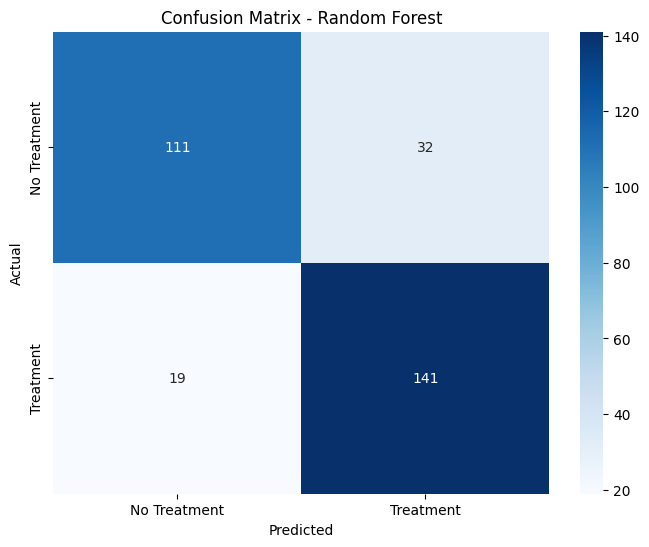

In [73]:
# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the classification report
print("Accuracy:", round(accuracy_rf*100,4))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [74]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

pred_test_df

,Actual,Predicted
101,0,0
432,1,1
309,1,1
109,1,1
1001,1,1
...,...,...
1045,1,1
3,1,1
482,1,1
724,1,1


##### Evaluating using R^2

In [75]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_rf_model_test = round(rf_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_rf_model_test))

R^2 Test: 0.83


##### Determine Feature Importance

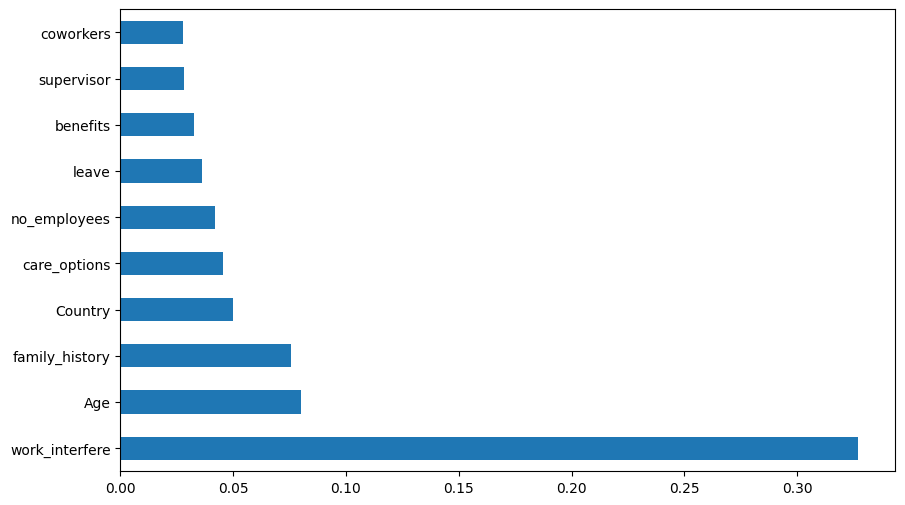

In [76]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

#### Gaussian Navie Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

##### Predictions

In [78]:
# Predict the target variable on the test set
y_pred_nb = nb_model.predict(X_test)

##### Evaluate the model

Accuracy: 77.8878
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       143
           1       0.80      0.78      0.79       160

    accuracy                           0.78       303
   macro avg       0.78      0.78      0.78       303
weighted avg       0.78      0.78      0.78       303



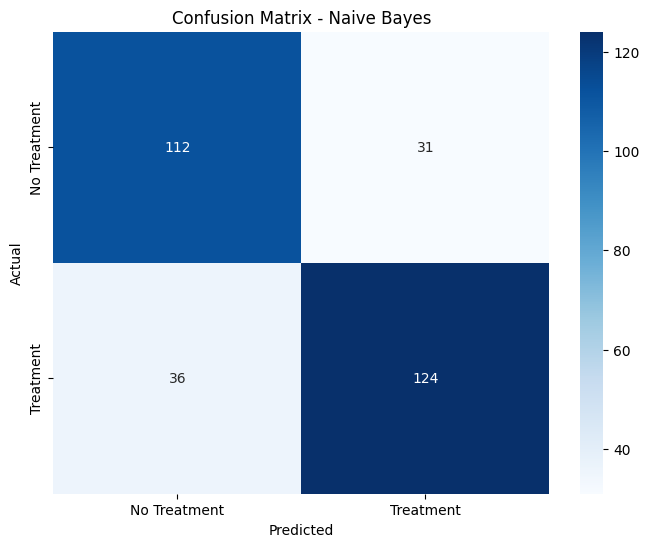

In [79]:
# Evaluate the model performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy:", round(accuracy_nb*100,4))
# Evaluate the model performance
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Evaluating using R^2

In [80]:
r2_nb_model_test = round(nb_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_nb_model_test))

R^2 Test: 0.78


##### Feature Importance

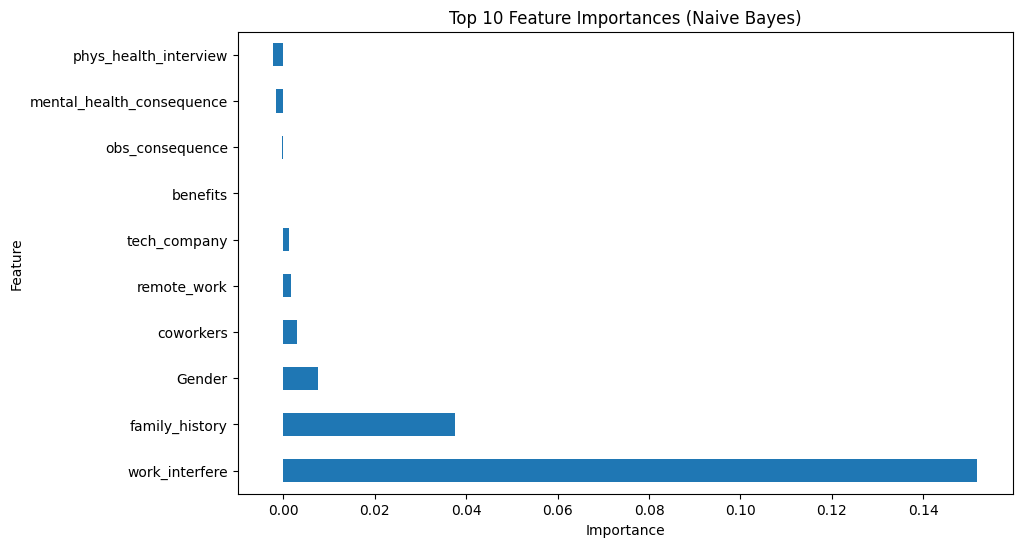

In [81]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a Series for the importance scores
feat_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)

plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Naive Bayes)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### __GridSearchCV__

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [83]:

# Separate the features and the target variable
X = data_imputed.drop(columns=['treatment'])
y = data_imputed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Grid parameters

In [84]:
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    }
}

##### Calculating Best Models

In [85]:
best_models = {}
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1, verbose=2)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_

    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best score for {model_name}: {clf.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for RandomForestClassifier: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Best score for RandomForestClassifier: 0.828299770311415
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.7941723198547086


In [86]:
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: RandomForestClassifier
Accuracy: 0.8305785123966942
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       112
           1       0.80      0.91      0.85       130

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.83       242
weighted avg       0.84      0.83      0.83       242

------------------------------------------------------------
Model: GaussianNB
Accuracy: 0.78099173553719
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.80      0.79      0.80       130

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

------------------------------------------------------------


##### Model Comparison

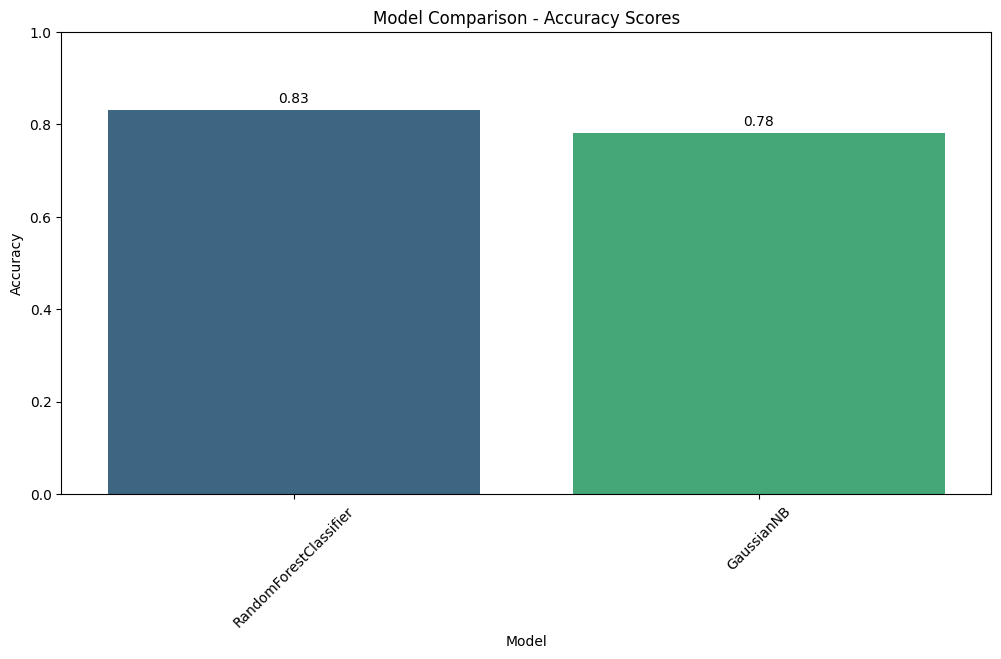

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

# Compare the accuracy of the best models
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add accuracy annotations on the bars
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

##### Hyper Parameter Tuning

###### _Random Forest_

In [88]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8241867421612094


###### _Guassian NB_

In [89]:
param_grid_gnb = {}

grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb.fit(X_train, y_train)

print("Best parameters for GaussianNB:", grid_search_gnb.best_params_)
print("Best score for GaussianNB:", grid_search_gnb.best_score_)

Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.7941723198547086


###### _Model Evaluation and Visualization_

In [90]:
# Collect the best estimators
best_models = {
    'Random Forest': grid_search_rf.best_estimator_,
    'GausianNB': grid_search_gnb.best_estimator_
}

# Evaluate and plot confusion matrices
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80       112
           1       0.80      0.91      0.85       130

    accuracy                           0.83       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.83      0.83      0.82       242

GausianNB Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.80      0.79      0.80       130

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242



#### _Comapring the performace of the models_

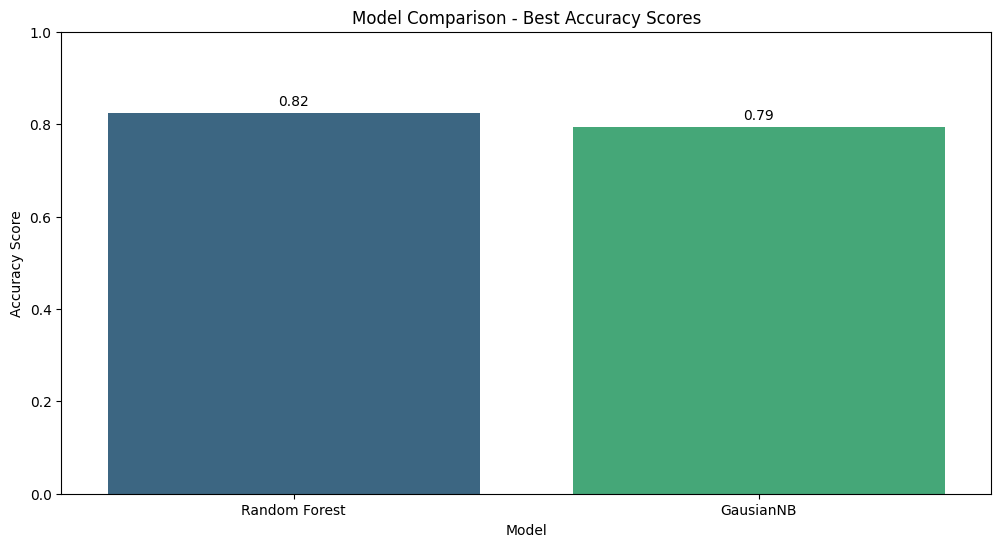

In [91]:
# Extract the best scores
model_names = list(best_models.keys())
best_scores = [

    grid_search_rf.best_score_,
    grid_search_gnb.best_score_
]

# Plot the accuracy scores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=best_scores, palette='viridis')
plt.title('Model Comparison - Best Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

# Add accuracy annotations on the bars
for i, score in enumerate(best_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.show()